<a href="https://colab.research.google.com/github/GildoFilhoAntonio/ProcessMining/blob/main/PM4PY_token_replay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pm4py -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

import pm4py

from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter

from pm4py.algo.conformance.tokenreplay import algorithm as token_replay # Import the token_replay algorithm

from pm4py.objects.petri_net.importer import importer as pnml_importer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from IPython.display import Image

from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.petri_net.utils.petri_utils import add_arc_from_to
from pm4py.objects.petri_net.importer import importer as pnml_importer
from pm4py.visualization.petri_net import visualizer as pn_visualizer


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Mestrado/dados/new_log_eventos_final_completo1.csv", sep=";")

df

,Semestre_letivo,id_discente,codigo
0,2015-01-01,999001,semestre01
1,2015-02-01,999001,QXD0005
2,2015-02-01,999001,QXD0103
3,2015-02-01,999001,QXD0001
4,2015-02-01,999001,QXD0108
...,...,...,...
8078,2017-06-01,999545,QXD0110_APROVADO
8079,2017-07-01,999545,semestre08
8080,2017-08-01,999545,QXD0038
8081,2017-11-01,999545,QXD0038_APROVADO


In [ ]:
df_log = pm4py.format_dataframe(df, case_id='id_discente', activity_key='codigo', timestamp_key='Semestre_letivo')
df_log


,Semestre_letivo,id_discente,codigo,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,2015-01-01,999001,semestre01,999001,semestre01,2015-01-01,0,0
1,2015-02-01,999001,QXD0005,999001,QXD0005,2015-02-01,1,0
2,2015-02-01,999001,QXD0103,999001,QXD0103,2015-02-01,2,0
3,2015-02-01,999001,QXD0001,999001,QXD0001,2015-02-01,3,0
4,2015-02-01,999001,QXD0108,999001,QXD0108,2015-02-01,4,0
...,...,...,...,...,...,...,...,...
8078,2017-06-01,999545,QXD0110_APROVADO,999545,QXD0110_APROVADO,2017-06-01,8078,113
8079,2017-07-01,999545,semestre08,999545,semestre08,2017-07-01,8079,113
8080,2017-08-01,999545,QXD0038,999545,QXD0038,2017-08-01,8080,113
8081,2017-11-01,999545,QXD0038_APROVADO,999545,QXD0038_APROVADO,2017-11-01,8081,113


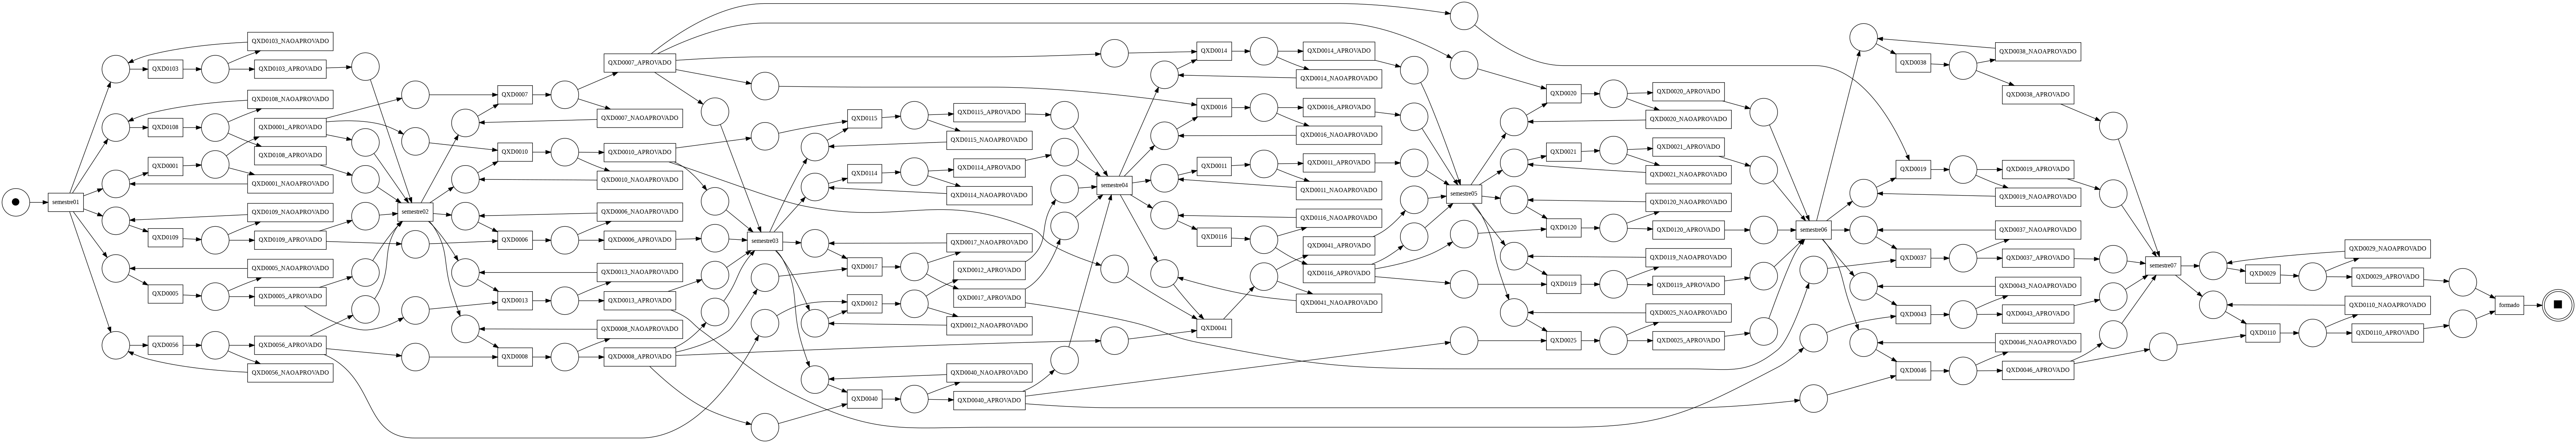

In [ ]:
netCC, initial_marking, final_marking = pnml_importer.apply("/content/drive/MyDrive/Mestrado/dados/netCompleta_SEM_8_SEMESTRE_APROV_NAP.pnml")

# Gerando a visualização
gviz = pn_visualizer.apply(netCC, initial_marking, final_marking)

# Salvando a imagem como PNG
pn_visualizer.save(gviz, "curriculo_rede_petri.png")

# Exibindo a imagem dentro do notebook
display(Image("curriculo_rede_petri.png"))

In [ ]:
#from pm4py.algo.conformance.tokenreplay import factory as token_replay
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

# Executar token-based replay
replayed_traces = token_replay.apply(df_log, netCC, initial_marking, final_marking)

# Analisar resultados
for trace in replayed_traces:
    print(trace)  # Inclui fitness e diagnósticos detalhados


replaying log with TBR, completed traces ::   0%|          | 0/100 [00:00<?, ?it/s]

{'trace_is_fit': False, 'trace_fitness': 0.8923042901371074, 'activated_transitions': [(t0, 'semestre01'), (t9, 'QXD0005'), (t23, 'QXD0103'), (t7, 'QXD0001'), (t24, 'QXD0108'), (t26, 'QXD0056'), (t22, 'QXD0109'), (t20, 'QXD0005_NAOAPROVADO'), (t29, 'QXD0103_APROVADO'), (t17, 'QXD0001_APROVADO'), (t19, 'QXD0108_APROVADO'), (t27, 'QXD0056_APROVADO'), (t21, 'QXD0109_NAOAPROVADO'), (t1, 'semestre02'), (t9, 'QXD0005'), (t12, 'QXD0010'), (t13, 'QXD0008'), (t22, 'QXD0109'), (t11, 'QXD0007'), (t25, 'QXD0005_APROVADO'), (t32, 'QXD0010_APROVADO'), (t34, 'QXD0008_NAOAPROVADO'), (t28, 'QXD0109_APROVADO'), (t31, 'QXD0007_APROVADO'), (t2, 'semestre03'), (t48, 'QXD0115'), (t13, 'QXD0008'), (t45, 'QXD0012'), (t49, 'QXD0114'), (t16, 'QXD0013'), (t58, 'QXD0115_APROVADO'), (t34, 'QXD0008_NAOAPROVADO'), (t50, 'QXD0012_APROVADO'), (t59, 'QXD0114_APROVADO'), (t39, 'QXD0013_APROVADO'), (t60, 'semestre04'), (t44, 'QXD0116'), (t14, 'QXD0006'), (t42, 'QXD0011'), (t40, 'QXD0016'), (t13, 'QXD0008'), (t74, 'QXD011

In [ ]:
#replayed_traces = token_replay.apply(dataframe, netCC, initial_marking, final_marking)

traces_results = []

for trace_result in replayed_traces:
    # Verificar se o aluno se formou (presença da transição 'verificador' nas transições ativadas)
    aluno_formado = any(transition.label == 'formado' for transition in trace_result['activated_transitions'])

    traces_results.append({
        'Status_Final': 'Aluno Formado' if aluno_formado else 'Aluno Não Formado',
        'trace_fitness': trace_result['trace_fitness'],
        'produced_tokens': trace_result['produced_tokens'],
        'consumed_tokens': trace_result['consumed_tokens'],
        'missing_tokens': trace_result['missing_tokens'],
        'remaining_tokens': trace_result['remaining_tokens'],
    })

df_traces = pd.DataFrame(traces_results)

#pd.set_option("display.max_rows", None)
df_traces

,Status_Final,trace_fitness,produced_tokens,consumed_tokens,missing_tokens,remaining_tokens
0,Aluno Formado,0.892304,133,136,16,13
1,Aluno Não Formado,0.285749,46,45,32,33
2,Aluno Não Formado,0.575188,76,77,33,32
3,Aluno Formado,0.802492,157,170,39,26
4,Aluno Não Formado,0.610976,82,85,34,31
...,...,...,...,...,...,...
109,Aluno Formado,0.957981,129,132,7,4
110,Aluno Não Formado,0.307729,46,45,31,32
111,Aluno Formado,1.000000,123,123,0,0
112,Aluno Não Formado,0.821931,118,123,24,19


In [ ]:
df_traces.describe()

,trace_fitness,produced_tokens,consumed_tokens,missing_tokens,remaining_tokens
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.694903,109.026316,113.754386,27.526316,22.798246
std,0.238252,42.669021,49.074724,14.002029,12.211397
min,0.216899,42.000000,41.000000,0.000000,0.000000
25%,0.489825,62.500000,63.000000,21.250000,12.000000
50%,0.779927,123.000000,123.000000,31.500000,28.000000
75%,0.887278,141.750000,151.000000,36.750000,33.000000
max,1.000000,194.000000,220.000000,55.000000,41.000000


# Estatística de alunos formados

In [ ]:
# Identificar os id_discentes que possuem "formado" na coluna "codigo"
formados = df_traces[df_traces["Status_Final"] == "Aluno Formado"]
formados

,Status_Final,trace_fitness,produced_tokens,consumed_tokens,missing_tokens,remaining_tokens
0,Aluno Formado,0.892304,133,136,16,13
3,Aluno Formado,0.802492,157,170,39,26
6,Aluno Formado,1.000000,123,123,0,0
7,Aluno Formado,0.919662,129,132,12,9
14,Aluno Formado,0.830351,173,189,39,23
17,Aluno Formado,0.884903,145,156,23,12
25,Aluno Formado,1.000000,123,123,0,0
33,Aluno Formado,0.930824,129,131,10,8
37,Aluno Formado,1.000000,123,123,0,0
40,Aluno Formado,0.895766,129,130,14,13


In [ ]:
print("Estatísticas dos alunos formados")
formados.describe()

Estatísticas dos alunos formados


,trace_fitness,produced_tokens,consumed_tokens,missing_tokens,remaining_tokens
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.921701,136.526316,142.184211,14.868421,9.210526
std,0.065766,15.508911,21.778809,14.171099,8.412211
min,0.800262,123.000000,123.000000,0.000000,0.000000
25%,0.880575,123.000000,123.000000,2.250000,2.000000
50%,0.932086,129.000000,132.500000,9.500000,8.000000
75%,0.982829,145.000000,155.250000,25.250000,13.000000
max,1.000000,185.000000,206.000000,50.000000,29.000000


# Estatística de alunos não formados

In [ ]:
# Identificar os id_discentes que possuem "formado" na coluna "codigo"
nao_formados = df_traces[df_traces["Status_Final"] == "Aluno Não Formado"]
nao_formados


,Status_Final,trace_fitness,produced_tokens,consumed_tokens,missing_tokens,remaining_tokens
1,Aluno Não Formado,0.285749,46,45,32,33
2,Aluno Não Formado,0.575188,76,77,33,32
4,Aluno Não Formado,0.610976,82,85,34,31
5,Aluno Não Formado,0.285749,46,45,32,33
8,Aluno Não Formado,0.285749,46,45,32,33
...,...,...,...,...,...,...
104,Aluno Não Formado,0.663467,98,101,35,32
105,Aluno Não Formado,0.291290,51,52,37,36
107,Aluno Não Formado,0.492424,66,64,32,34
110,Aluno Não Formado,0.307729,46,45,31,32


In [ ]:
print("Estatísticas dos alunos não formados")
nao_formados.describe()

Estatísticas dos alunos não formados


,trace_fitness,produced_tokens,consumed_tokens,missing_tokens,remaining_tokens
count,76.000000,76.000000,76.000000,76.000000,76.000000
mean,0.581503,95.276316,99.539474,33.855263,29.592105
std,0.210471,45.273568,52.728346,8.634356,7.031695
min,0.216899,42.000000,41.000000,9.000000,4.000000
25%,0.389835,54.000000,51.000000,31.000000,28.000000
50%,0.589310,79.000000,83.000000,32.000000,32.000000
75%,0.778881,137.750000,142.500000,38.000000,33.250000
max,0.952701,194.000000,220.000000,55.000000,41.000000


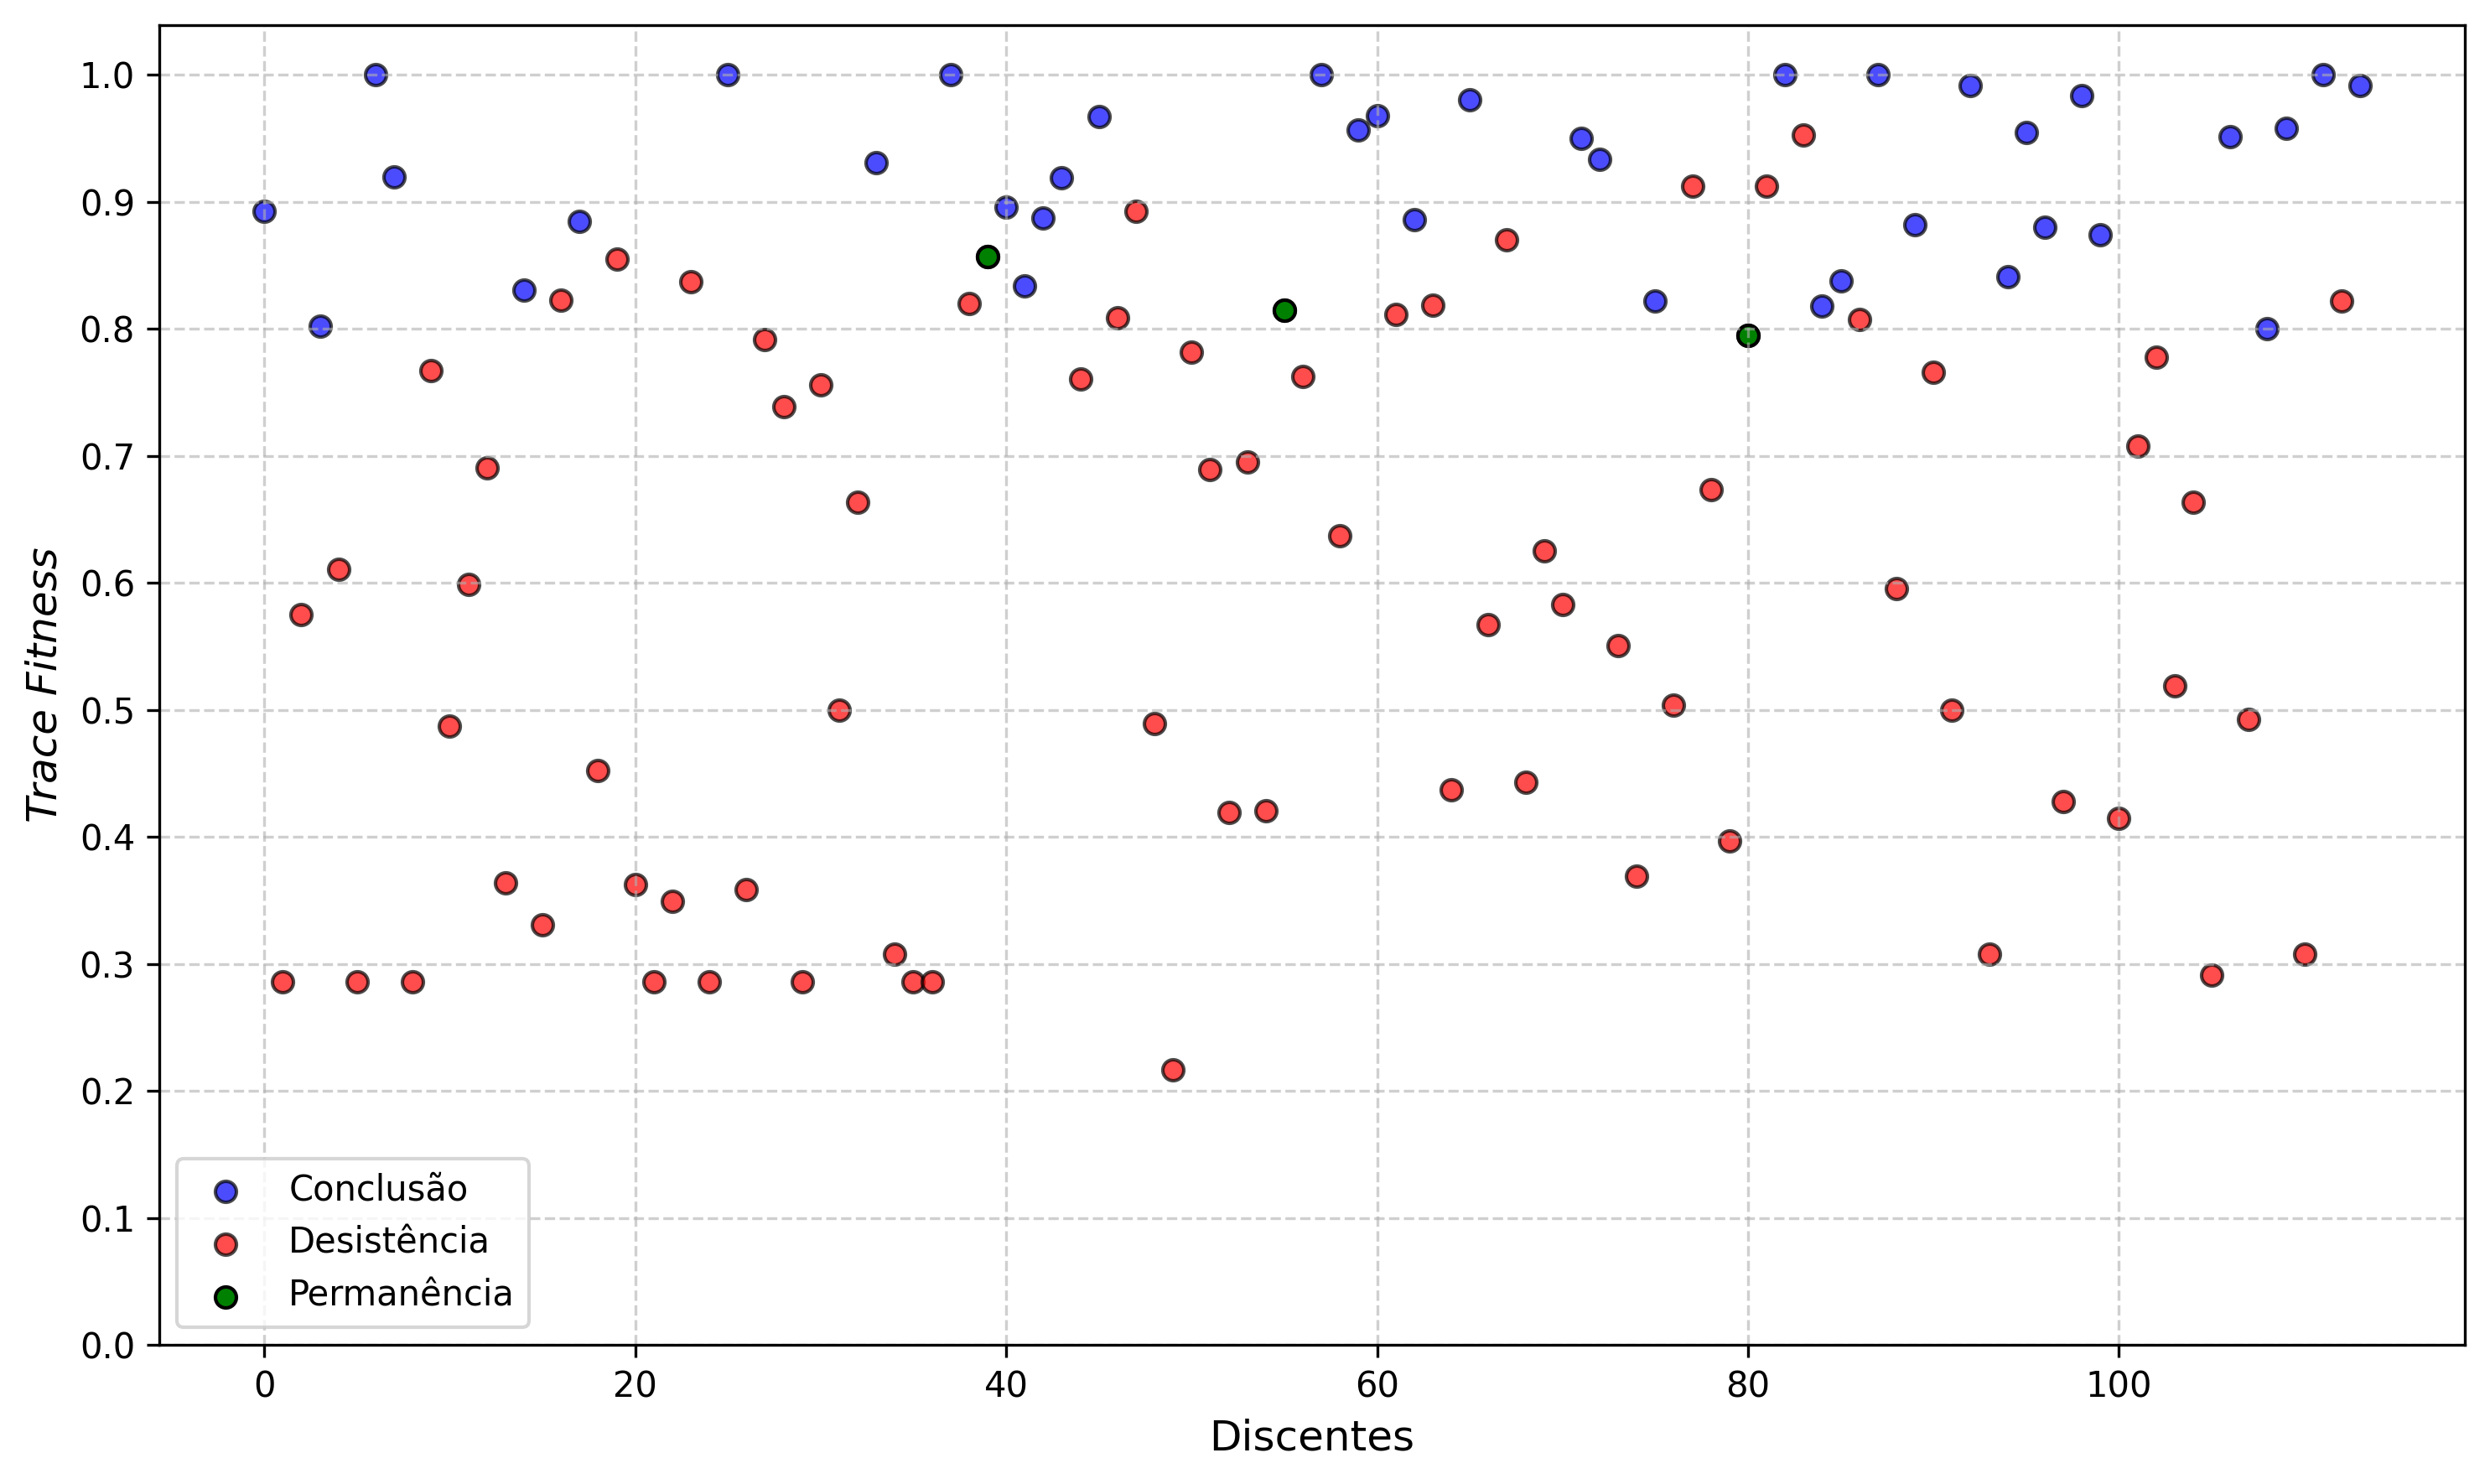

In [ ]:
# Reimportar bibliotecas após reset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Adicionar coluna de status
df_traces["Status"] = df_traces["Status_Final"].apply(lambda x: "Formado" if x == "Aluno Formado" else "Não Formado")

# Definir cores e rótulos
status_colors = {"Formado": "blue", "Não Formado": "red"}
status_labels = {"Formado": "Conclusão", "Não Formado": "Desistência"}
indices_verdes = [39, 55, 80]

# Criar o gráfico
plt.figure(figsize=(10, 6), dpi=300)
for status in status_colors.keys():
    status_data = df_traces[df_traces["Status"] == status]
    plt.scatter(status_data.index, status_data["trace_fitness"],
                color=status_colors[status], label=status_labels[status], alpha=0.7, edgecolor='k')

# Adicionar pontos verdes
verde_data = df_traces.loc[indices_verdes]
plt.scatter(verde_data.index, verde_data["trace_fitness"],
            color='green', label='Permanência', edgecolor='black', linewidth=1)

# Personalizar o gráfico
plt.xlabel('Discentes', fontsize=12)
plt.ylabel('Trace Fitness', fontsize=12, style='italic')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

#plt.savefig('new_dispersao_trace_fitness_discentes_formacao.pdf', dpi=300, bbox_inches='tight')

# Salvar o gráfico
#output_path = "/mnt/data/dispersao_trace_fitness_marcado.pdf"
#plt.savefig(output_path, dpi=300, bbox_inches='tight')
#output_path


# Transições por aprovação e reprovação

In [ ]:
from collections import Counter

# Contador para as transições ativadas
transition_frequency = Counter()

# Iterar sobre os resultados de todas as traces
for trace_result in replayed_traces:
    # Obter as transições ativadas nesta trace
    activated_transitions = trace_result['activated_transitions']
    # Incrementar a frequência das transições ativadas
    for transition in activated_transitions:
        transition_frequency[transition.label] += 1



# Exibir as transições e suas frequências
for transition, freq in transition_frequency.items():
    print(f"Transição: {transition}, Frequência: {freq}")

# Visualizar graficamente
import matplotlib.pyplot as plt

# Dados para o gráfico
transitions = list(transition_frequency.keys())
frequencies = list(transition_frequency.values())

# Plotar
#plt.figure(figsize=(12, 6))
#plt.bar(transitions, frequencies)
#plt.xlabel('Transições')
#plt.ylabel('Frequência')
#plt.title('Frequência de Transições Ativadas')
#plt.xticks(rotation=90)
#plt.tight_layout()
#plt.show()
df_transitions = pd.DataFrame(transition_frequency.items(), columns=['Transição', 'Frequência'])

Transição: semestre01, Frequência: 114
Transição: QXD0005, Frequência: 150
Transição: QXD0103, Frequência: 113
Transição: QXD0001, Frequência: 152
Transição: QXD0108, Frequência: 117
Transição: QXD0056, Frequência: 147
Transição: QXD0109, Frequência: 203
Transição: QXD0005_NAOAPROVADO, Frequência: 67
Transição: QXD0103_APROVADO, Frequência: 96
Transição: QXD0001_APROVADO, Frequência: 83
Transição: QXD0108_APROVADO, Frequência: 95
Transição: QXD0056_APROVADO, Frequência: 91
Transição: QXD0109_NAOAPROVADO, Frequência: 133
Transição: semestre02, Frequência: 114
Transição: QXD0010, Frequência: 140
Transição: QXD0008, Frequência: 140
Transição: QXD0007, Frequência: 124
Transição: QXD0005_APROVADO, Frequência: 83
Transição: QXD0010_APROVADO, Frequência: 63
Transição: QXD0008_NAOAPROVADO, Frequência: 72
Transição: QXD0109_APROVADO, Frequência: 70
Transição: QXD0007_APROVADO, Frequência: 71
Transição: semestre03, Frequência: 114
Transição: QXD0115, Frequência: 79
Transição: QXD0012, Frequência

In [ ]:
import pandas as pd

# Dicionário intermediário para acumular resultados
dados = {}

for transicao, freq in transition_frequency.items():
    if "_APROVADO" in transicao:
        codigo = transicao.replace("_APROVADO", "")
        dados.setdefault(codigo, {"Aprovado": 0, "Nao_aprovado": 0})
        dados[codigo]["Aprovado"] += freq
    elif "_NAOAPROVADO" in transicao:
        codigo = transicao.replace("_NAOAPROVADO", "")
        dados.setdefault(codigo, {"Aprovado": 0, "Nao_aprovado": 0})
        dados[codigo]["Nao_aprovado"] += freq

# Converter para DataFrame
df_resultado = pd.DataFrame([
    {"Disciplina": k, "Aprovado": v["Aprovado"], "Nao_aprovado": v["Nao_aprovado"]}
    for k, v in dados.items()
])

# Ordenar por total (opcional)
df_resultado["Total"] = df_resultado["Aprovado"] + df_resultado["Nao_aprovado"]
df_resultado = df_resultado.sort_values(by="Total", ascending=False).reset_index(drop=True)

df_resultado


,Disciplina,Aprovado,Nao_aprovado,Total
0,QXD0109,70,133,203
1,QXD0001,83,69,152
2,QXD0005,83,67,150
3,QXD0056,91,56,147
4,QXD0010,63,77,140
5,QXD0008,68,72,140
6,QXD0013,64,63,127
7,QXD0007,71,53,124
8,QXD0011,63,57,120
9,QXD0116,54,64,118


In [ ]:
# Dicionário de mapeamento
semestres = {
    "SEMESTRE 01": ["SEMESTRE 01", "QXD0001", "QXD0108", "QXD0005", "QXD0056", "QXD0109", "QXD0103"],
    "SEMESTRE 02": ["SEMESTRE 02", "QXD0007", "QXD0010", "QXD0013", "QXD0006", "QXD0008"],
    "SEMESTRE 03": ["SEMESTRE 03", "QXD0115", "QXD0017", "QXD0114", "QXD0012", "QXD0040"],
    "SEMESTRE 04": ["SEMESTRE 04", "QXD0011", "QXD0014", "QXD0016", "QXD0041", "QXD0116"],
    "SEMESTRE 05": ["SEMESTRE 05", "QXD0020", "QXD0021", "QXD0025", "QXD0119", "QXD0120"],
    "SEMESTRE 06": ["SEMESTRE 06", "QXD0019", "QXD0037", "QXD0038", "QXD0043", "QXD0046"],
    "SEMESTRE 07": ["SEMESTRE 07", "QXD0029", "QXD0110", "QXD0111", "QXD0104"]
}

# Inverter o dicionário para mapear disciplina → semestre
mapa_disciplina_para_semestre = {}
for semestre, disciplinas in semestres.items():
    for disc in disciplinas:
        if "SEMESTRE" not in disc:  # Ignora o rótulo do cluster
            mapa_disciplina_para_semestre[disc] = semestre

# Aplicar ao DataFrame
df_resultado["Semestre"] = df_resultado["Disciplina"].map(mapa_disciplina_para_semestre)

df_resultado


,Disciplina,Aprovado,Nao_aprovado,Total,Semestre
0,QXD0109,70,133,203,SEMESTRE 01
1,QXD0001,83,69,152,SEMESTRE 01
2,QXD0005,83,67,150,SEMESTRE 01
3,QXD0056,91,56,147,SEMESTRE 01
4,QXD0010,63,77,140,SEMESTRE 02
5,QXD0008,68,72,140,SEMESTRE 02
6,QXD0013,64,63,127,SEMESTRE 02
7,QXD0007,71,53,124,SEMESTRE 02
8,QXD0011,63,57,120,SEMESTRE 04
9,QXD0116,54,64,118,SEMESTRE 04


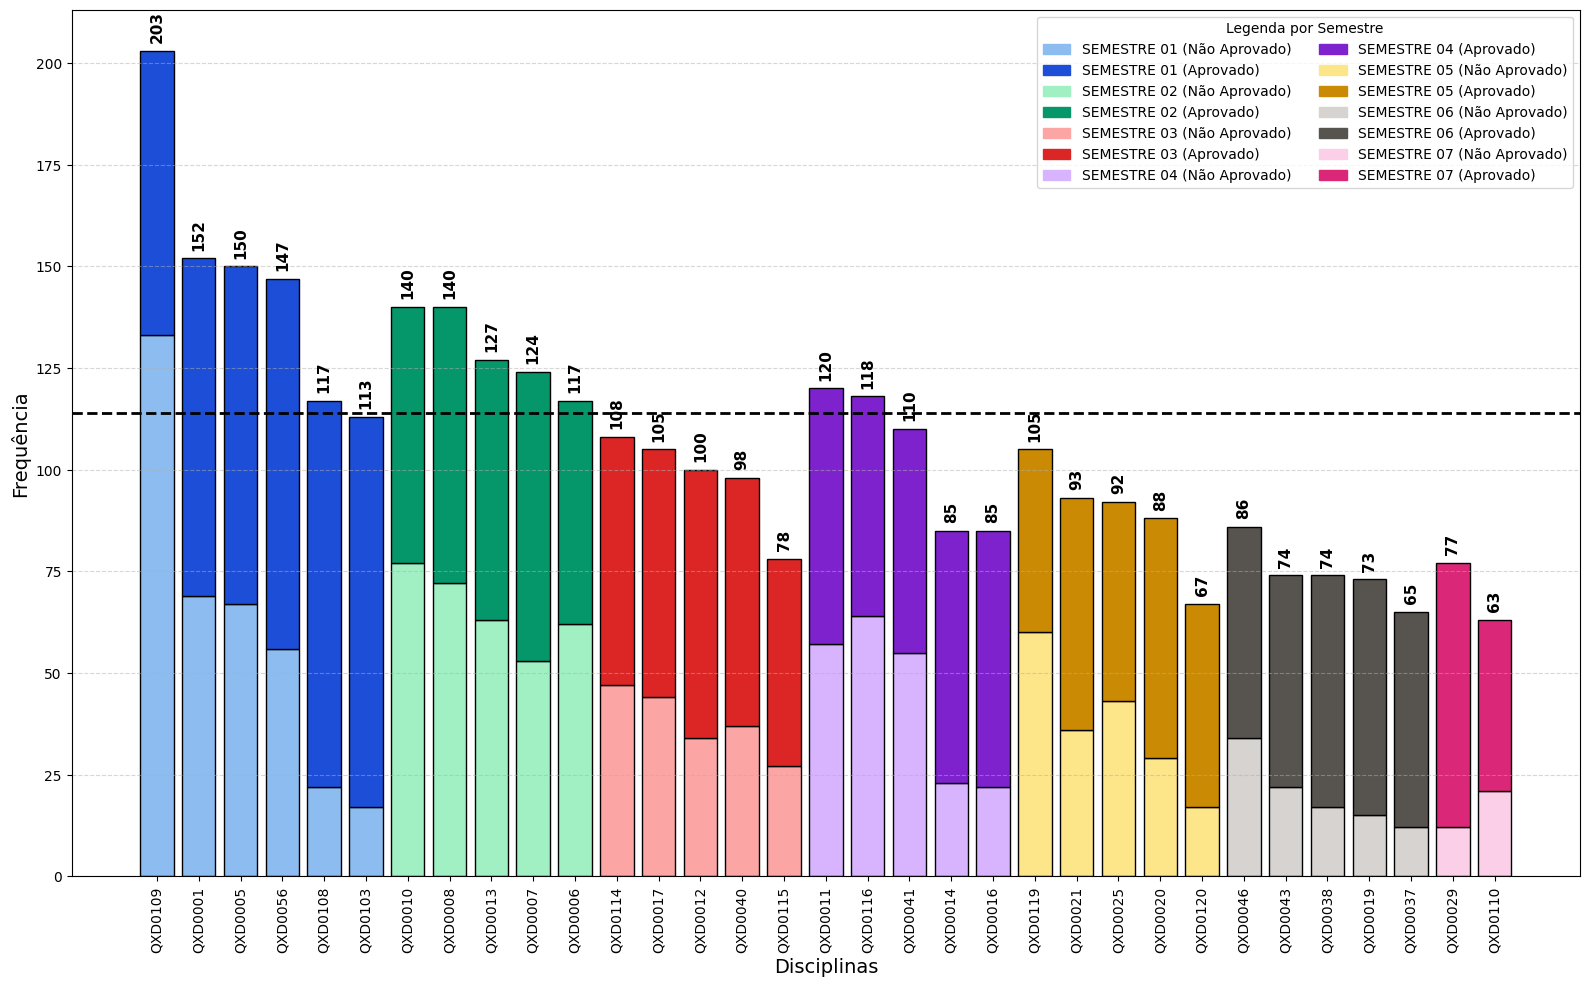

In [ ]:
import matplotlib.pyplot as plt

# Cores distintas para cada semestre (Não Aprovado, Aprovado)
cores_semestres_empilhadas = {
    "SEMESTRE 01": ('#8cbcf0', '#1d4ed8'),  # azul claro / azul escuro
    "SEMESTRE 02": ('#a1f0c4', '#059669'),  # verde claro / verde escuro
    "SEMESTRE 03": ('#fca5a5', '#dc2626'),  # vermelho claro / vermelho escuro
    "SEMESTRE 04": ('#d8b4fe', '#7e22ce'),  # roxo claro / roxo escuro
    "SEMESTRE 05": ('#fde68a', '#ca8a04'),  # amarelo claro / amarelo escuro
    "SEMESTRE 06": ('#d6d3d1', '#57534e'),  # marrom claro / marrom escuro
    "SEMESTRE 07": ('#fbcfe8', '#db2777')   # rosa claro / rosa escuro
}

# Ordenar por semestre e total
ordem_semestres = {
    "SEMESTRE 01": 1, "SEMESTRE 02": 2, "SEMESTRE 03": 3,
    "SEMESTRE 04": 4, "SEMESTRE 05": 5, "SEMESTRE 06": 6, "SEMESTRE 07": 7
}
df_resultado['Semestre_ordenado'] = df_resultado['Semestre'].map(ordem_semestres)
df_resultado = df_resultado.sort_values(by=['Semestre_ordenado', 'Total'], ascending=[True, False]).reset_index(drop=True)

# Iniciar figura
plt.figure(figsize=(16, 10))

# Para legenda
legenda_semestres = {}

# Barras personalizadas por disciplina
for idx, row in df_resultado.iterrows():
    disc = row['Disciplina']
    semestre = row['Semestre']
    aprov = row['Aprovado']
    nao_aprov = row['Nao_aprovado']

    # Cores para o semestre atual
    cor_nao_aprovado, cor_aprovado = cores_semestres_empilhadas.get(semestre, ('grey', 'black'))

    # Barras
    plt.bar(idx, nao_aprov, color=cor_nao_aprovado, edgecolor='black')
    plt.bar(idx, aprov, bottom=nao_aprov, color=cor_aprovado, edgecolor='black')

    # Rótulo com o total
    total = aprov + nao_aprov
    plt.text(idx, total + 2, str(total), ha='center', va='bottom', fontsize=11, fontweight='bold', rotation=90)

    # Salvar para legenda apenas uma vez por semestre
    if semestre not in legenda_semestres:
        legenda_semestres[semestre] = (
            plt.Rectangle((0,0),1,1, color=cor_nao_aprovado, label=f'{semestre} (Não Aprovado)'),
            plt.Rectangle((0,0),1,1, color=cor_aprovado, label=f'{semestre} (Aprovado)')
        )

# Legenda final combinando todos os semestres
handles = []
labels = []
for pares in legenda_semestres.values():
    handles.extend(pares)
    labels.extend([h.get_label() for h in pares])

plt.legend(handles, labels, title="Legenda por Semestre", ncol=2)

# Linha horizontal no valor 114
plt.axhline(y=114, color='black', linestyle='--', linewidth=2, label="Referência 114")

# Eixos e aparência
plt.xlabel('Disciplinas', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
#plt.title('Frequência de Aprovados e Não Aprovados por Disciplina (Cores por Semestre)', fontsize=13)
plt.xticks(ticks=range(len(df_resultado)), labels=df_resultado['Disciplina'], rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Salvar o gráfico
#plt.savefig('new_transicaoDisciplinas_atuali.pdf', dpi=300, bbox_inches='tight')

plt.show()


# Transições

In [ ]:
from collections import Counter

# Contador para as transições ativadas
transition_frequency = Counter()

# Iterar sobre os resultados de todas as traces
for trace_result in replayed_traces:
    # Obter as transições ativadas nesta trace
    activated_transitions = trace_result['activated_transitions']
    # Incrementar a frequência das transições ativadas
    for transition in activated_transitions:
        transition_frequency[transition.label] += 1



# Exibir as transições e suas frequências
for transition, freq in transition_frequency.items():
    print(f"Transição: {transition}, Frequência: {freq}")

# Visualizar graficamente
import matplotlib.pyplot as plt

# Dados para o gráfico
transitions = list(transition_frequency.keys())
frequencies = list(transition_frequency.values())

# Plotar
#plt.figure(figsize=(12, 6))
#plt.bar(transitions, frequencies)
#plt.xlabel('Transições')
#plt.ylabel('Frequência')
#plt.title('Frequência de Transições Ativadas')
#plt.xticks(rotation=90)
#plt.tight_layout()
#plt.show()
df_transitions = pd.DataFrame(transition_frequency.items(), columns=['Transição', 'Frequência'])

Transição: semestre01, Frequência: 114
Transição: QXD0005, Frequência: 150
Transição: QXD0103, Frequência: 113
Transição: QXD0001, Frequência: 152
Transição: QXD0108, Frequência: 117
Transição: QXD0056, Frequência: 147
Transição: QXD0109, Frequência: 203
Transição: QXD0005_NAOAPROVADO, Frequência: 67
Transição: QXD0103_APROVADO, Frequência: 96
Transição: QXD0001_APROVADO, Frequência: 83
Transição: QXD0108_APROVADO, Frequência: 95
Transição: QXD0056_APROVADO, Frequência: 91
Transição: QXD0109_NAOAPROVADO, Frequência: 133
Transição: semestre02, Frequência: 114
Transição: QXD0010, Frequência: 140
Transição: QXD0008, Frequência: 140
Transição: QXD0007, Frequência: 124
Transição: QXD0005_APROVADO, Frequência: 83
Transição: QXD0010_APROVADO, Frequência: 63
Transição: QXD0008_NAOAPROVADO, Frequência: 72
Transição: QXD0109_APROVADO, Frequência: 70
Transição: QXD0007_APROVADO, Frequência: 71
Transição: semestre03, Frequência: 114
Transição: QXD0115, Frequência: 79
Transição: QXD0012, Frequência

In [ ]:
# Criando clusters para cada semestre
semestres = {
    "SEMESTRE 01": ["SEMESTRE 01", "QXD0001", "QXD0108", "QXD0005", "QXD0056", "QXD0109", "QXD0103"],
    "SEMESTRE 02": ["SEMESTRE 02", "QXD0007", "QXD0010", "QXD0013", "QXD0006", "QXD0008"],
    "SEMESTRE 03": ["SEMESTRE 03", "QXD0115", "QXD0017", "QXD0114", "QXD0012", "QXD0040"],
    "SEMESTRE 04": ["SEMESTRE 04", "QXD0011", "QXD0014", "QXD0016", "QXD0041", "QXD0116"],
    "SEMESTRE 05": ["SEMESTRE 05", "QXD0020", "QXD0021", "QXD0025", "QXD0119", "QXD0120"],
    "SEMESTRE 06": ["SEMESTRE 06", "QXD0019", "QXD0037", "QXD0038", "QXD0043", "QXD0046"],
    "SEMESTRE 07": ["SEMESTRE 07", "QXD0029", "QXD0110", "QXD0111", "QXD0104"]
}

# Criar um dicionário para mapear cada disciplina ao seu respectivo semestre
disciplina_para_semestre = {}
for semestre, disciplinas in semestres.items():
    for disciplina in disciplinas[1:]:  # Ignorar o nome do semestre na lista
        disciplina_para_semestre[disciplina] = semestre

# Adicionar uma nova coluna 'Semestre' ao DataFrame df_transitions
df_transitions['Semestre'] = df_transitions['Transição'].map(lambda x: disciplina_para_semestre.get(x.split("->")[0], "Desconhecido"))

# Ordenar o DataFrame primeiro pelo semestre e depois pela frequência
df_transitions = df_transitions.sort_values(by=['Semestre', 'Frequência'], ascending=[True, False])

# Exibir o DataFrame atualizad
df_transitions

,Transição,Frequência,Semestre
12,QXD0109_NAOAPROVADO,133,Desconhecido
0,semestre01,114,Desconhecido
13,semestre02,114,Desconhecido
22,semestre03,114,Desconhecido
31,semestre04,114,Desconhecido
...,...,...,...
67,QXD0038,74,SEMESTRE 06
55,QXD0019,73,SEMESTRE 06
71,QXD0037,65,SEMESTRE 06
75,QXD0029,77,SEMESTRE 07


In [ ]:
# Filtrar o DataFrame para manter apenas as transições cujas disciplinas estão no dicionário de semestres
df_transitions_filtrado = df_transitions[df_transitions['Semestre'] != "Desconhecido"]
df_transitions_filtrado

,Transição,Frequência,Semestre
6,QXD0109,203,SEMESTRE 01
3,QXD0001,152,SEMESTRE 01
1,QXD0005,150,SEMESTRE 01
5,QXD0056,147,SEMESTRE 01
4,QXD0108,117,SEMESTRE 01
2,QXD0103,113,SEMESTRE 01
14,QXD0010,140,SEMESTRE 02
15,QXD0008,140,SEMESTRE 02
26,QXD0013,127,SEMESTRE 02
16,QXD0007,124,SEMESTRE 02


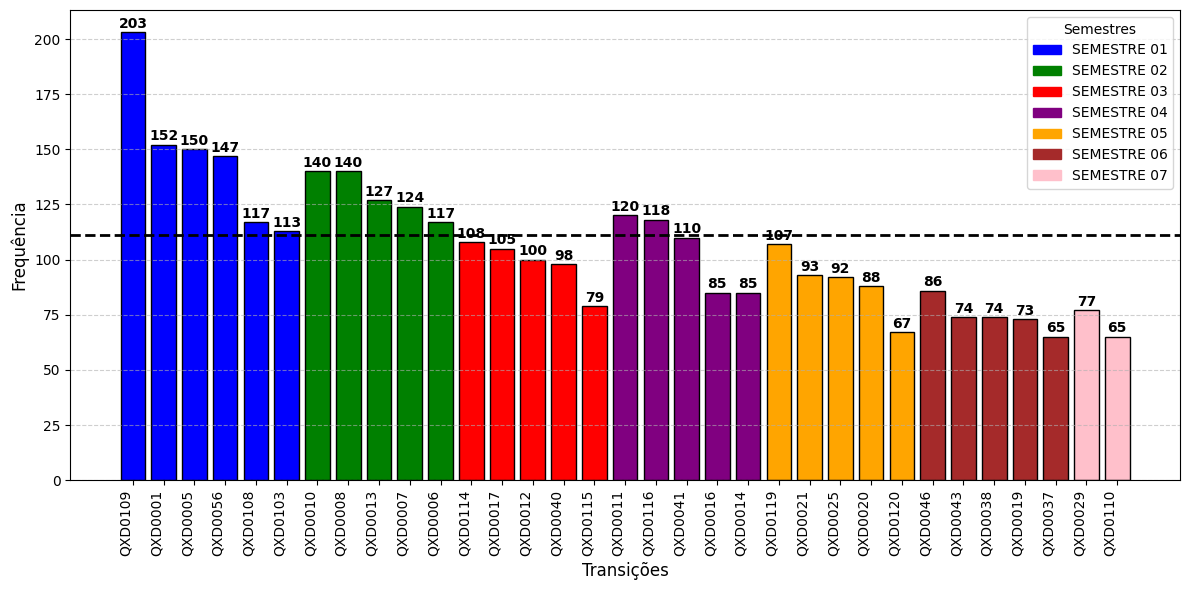

In [ ]:
# Reimportar bibliotecas após a redefinição do estado
import pandas as pd
import matplotlib.pyplot as plt

# Definir cores para cada semestre
cores_semestres = {
    "SEMESTRE 01": "blue",
    "SEMESTRE 02": "green",
    "SEMESTRE 03": "red",
    "SEMESTRE 04": "purple",
    "SEMESTRE 05": "orange",
    "SEMESTRE 06": "brown",
    "SEMESTRE 07": "pink"
}

# Criar lista de cores para cada barra com base no semestre
cores_barras = df_transitions_filtrado['Semestre'].map(cores_semestres)

# Criar gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(df_transitions_filtrado['Transição'], df_transitions_filtrado['Frequência'], color=cores_barras, edgecolor='black')

# Adicionar rótulos acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, str(yval), ha='center', fontsize=10, fontweight='bold')

# Criar legenda manualmente com base nas cores definidas
handles = [plt.Rectangle((0,0),1,1, color=cor) for cor in cores_semestres.values()]
labels = cores_semestres.keys()
plt.legend(handles, labels, title="Semestres")

# Adicionar uma linha horizontal no valor 305
plt.axhline(y=111, color='black', linestyle='--', linewidth=2, label="Referência 111")

# Personalizar o gráfico
plt.xlabel('Transições', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=90, ha='right')  # Rotacionar rótulos para melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Ajustar layout
plt.tight_layout()

# Salvar o gráfico
#plt.savefig('new_transicaoDisciplinas.pdf', dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()


# Tokens restantes

In [ ]:
import pandas as pd

# Criar uma lista para armazenar os dados das transições
transitions_data = []

# Iterar sobre todas as transições na rede de Petri
for transition in netCC.transitions:
    transition_label = transition.label if transition.label else transition.name  # Nome correto da transição

    # Obter os lugares de entrada e saída
    input_places = [arc.source.name for arc in transition.in_arcs]
    output_places = [arc.target.name for arc in transition.out_arcs]

    transitions_data.append({
        "Transição": transition_label,
        "Lugares de Entrada": ", ".join(input_places),
        "Lugares de Saída": ", ".join(output_places)
    })

# Criar um DataFrame
df_transitions = pd.DataFrame(transitions_data)

df_transitions


,Transição,Lugares de Entrada,Lugares de Saída
0,QXD0012,"p52, p104",p53
1,QXD0013,"p23, p32",p22
2,QXD0109_NAOAPROVADO,p7,p8
3,QXD0120,"p63, p120",p70
4,QXD0110,"p90, p122",p91
...,...,...,...
102,QXD0046,"p82, p117",p81
103,semestre05,"p72, p75, p73, p76, p74","p64, p63, p67, p71, p62"
104,semestre07,"p98, p99, p96, p100, p97","p90, p93"
105,QXD0041_APROVADO,p42,p73


In [ ]:
import pandas as pd
from collections import defaultdict

# Criar um dicionário para armazenar a contagem de tokens por lugar
tokens_por_lugar = defaultdict(int)

# Iterar sobre os traços do replay de tokens para consolidar reached_marking
for trace in replayed_traces:
    reached_marking = trace.get("reached_marking", {})
    for place, tokens in reached_marking.items():
        tokens_por_lugar[place.name] += tokens

# Criar um DataFrame com os resultados
df_tokens_reached_marking = pd.DataFrame(list(tokens_por_lugar.items()), columns=["Lugar", "Tokens Restantes"])

# Ordenar pelo maior número de tokens
df_tokens_reached_marking = df_tokens_reached_marking.sort_values(by="Tokens Restantes", ascending=False)

num_lugares = len(df_tokens_reached_marking)
print(f"Total de lugares em reached_marking: {num_lugares}")

df_tokens_reached_marking


Total de lugares em reached_marking: 91


,Lugar,Tokens Restantes
46,p93,77
42,p77,74
45,p90,72
34,p45,69
37,p67,69
...,...,...
83,p66,2
71,p113,1
64,p121,1
89,p51,1


In [ ]:
import pandas as pd

# Expandir as colunas de lugares de entrada e saída separadas por vírgula
df_transitions_expanded = df_transitions.assign(
    **{"Lugares de Entrada": df_transitions["Lugares de Entrada"].str.split(", ")}
).explode("Lugares de Entrada")

df_transitions_expanded = df_transitions_expanded.assign(
    **{"Lugares de Saída": df_transitions_expanded["Lugares de Saída"].str.split(", ")}
).explode("Lugares de Saída")

# Unir com df_tokens_reached_marking para obter os tokens nos lugares de entrada e saída
transitions_with_tokens = df_transitions_expanded.merge(
    df_tokens_reached_marking, left_on="Lugares de Entrada", right_on="Lugar", how="left"
).rename(columns={"Tokens Restantes": "Tokens no Lugar de Entrada"}).drop(columns=["Lugar"])

transitions_with_tokens = transitions_with_tokens.merge(
    df_tokens_reached_marking, left_on="Lugares de Saída", right_on="Lugar", how="left"
).rename(columns={"Tokens Restantes": "Tokens no Lugar de Saída"}).drop(columns=["Lugar"])

transitions_with_tokens

,Transição,Lugares de Entrada,Lugares de Saída,Tokens no Lugar de Entrada,Tokens no Lugar de Saída
0,QXD0012,p52,p53,50.0,NaN
1,QXD0012,p104,p53,15.0,NaN
2,QXD0013,p23,p22,50.0,NaN
3,QXD0013,p32,p22,9.0,NaN
4,QXD0109_NAOAPROVADO,p7,p8,NaN,44.0
...,...,...,...,...,...
286,semestre07,p100,p93,17.0,77.0
287,semestre07,p97,p90,15.0,72.0
288,semestre07,p97,p93,15.0,77.0
289,QXD0041_APROVADO,p42,p73,NaN,33.0


In [ ]:
df_transitions_tokens = pd.DataFrame(transitions_with_tokens)

df_transitions_tokens

,Transição,Lugares de Entrada,Lugares de Saída,Tokens no Lugar de Entrada,Tokens no Lugar de Saída
0,QXD0012,p52,p53,50.0,NaN
1,QXD0012,p104,p53,15.0,NaN
2,QXD0013,p23,p22,50.0,NaN
3,QXD0013,p32,p22,9.0,NaN
4,QXD0109_NAOAPROVADO,p7,p8,NaN,44.0
...,...,...,...,...,...
286,semestre07,p100,p93,17.0,77.0
287,semestre07,p97,p90,15.0,72.0
288,semestre07,p97,p93,15.0,77.0
289,QXD0041_APROVADO,p42,p73,NaN,33.0


In [ ]:
# Filtrar apenas as transições que contêm "_APROVADO"
transitions_with_tokens_reprovado = transitions_with_tokens[transitions_with_tokens["Transição"].str.contains("_NAOAPROVADO", na=False)]
transitions_with_tokens_reprovado

,Transição,Lugares de Entrada,Lugares de Saída,Tokens no Lugar de Entrada,Tokens no Lugar de Saída
4,QXD0109_NAOAPROVADO,p7,p8,NaN,44.0
13,QXD0017_NAOAPROVADO,p54,p56,NaN,54.0
49,QXD0115_NAOAPROVADO,p51,p47,1.0,64.0
53,QXD0001_NAOAPROVADO,p5,p6,NaN,31.0
56,QXD0021_NAOAPROVADO,p68,p67,NaN,69.0
57,QXD0025_NAOAPROVADO,p69,p71,NaN,66.0
63,QXD0056_NAOAPROVADO,p9,p10,NaN,23.0
68,QXD0010_NAOAPROVADO,p24,p28,NaN,51.0
80,QXD0120_NAOAPROVADO,p70,p63,NaN,66.0
82,QXD0119_NAOAPROVADO,p66,p62,2.0,69.0


In [ ]:
transitions_semestres = transitions_with_tokens[transitions_with_tokens["Transição"].str.contains("semestre", na=False)][["Transição",
                                                                                                                          "Lugares de Entrada"]]
transitions_semestres.rename(columns={'Lugares de Entrada': 'Lugares de Saída'}, inplace = True)
transitions_semestres

,Transição,Lugares de Saída
22,semestre04,p61
23,semestre04,p61
24,semestre04,p61
25,semestre04,p61
26,semestre04,p61
...,...,...
284,semestre07,p96
285,semestre07,p100
286,semestre07,p100
287,semestre07,p97


In [ ]:
# Merge entre transitions_with_tokens_aprovado e transitions_semestres
merged_transitions = transitions_with_tokens_reprovado.merge(
    transitions_semestres, left_on="Lugares de Saída", right_on="Lugares de Saída", how="left",
    suffixes=("_reprovado", "_semestre")
)
merged_transitions

,Transição_reprovado,Lugares de Entrada,Lugares de Saída,Tokens no Lugar de Entrada,Tokens no Lugar de Saída,Transição_semestre
0,QXD0109_NAOAPROVADO,p7,p8,NaN,44.0,NaN
1,QXD0017_NAOAPROVADO,p54,p56,NaN,54.0,NaN
2,QXD0115_NAOAPROVADO,p51,p47,1.0,64.0,NaN
3,QXD0001_NAOAPROVADO,p5,p6,NaN,31.0,NaN
4,QXD0021_NAOAPROVADO,p68,p67,NaN,69.0,NaN
5,QXD0025_NAOAPROVADO,p69,p71,NaN,66.0,NaN
6,QXD0056_NAOAPROVADO,p9,p10,NaN,23.0,NaN
7,QXD0010_NAOAPROVADO,p24,p28,NaN,51.0,NaN
8,QXD0120_NAOAPROVADO,p70,p63,NaN,66.0,NaN
9,QXD0119_NAOAPROVADO,p66,p62,2.0,69.0,NaN


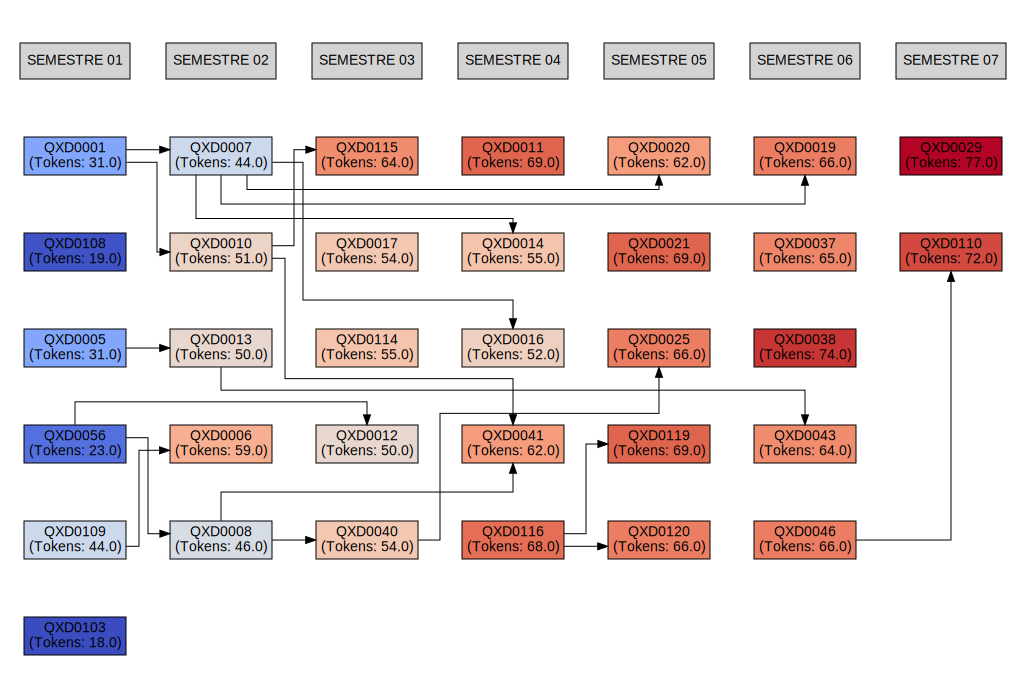

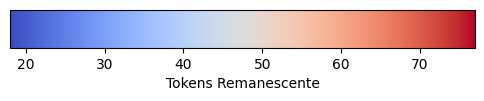

In [ ]:
import pandas as pd
from graphviz import Digraph
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Criar o grafo
dot = Digraph(format='png')
dot.attr(splines="ortho", rankdir='LR', nodesep="0.8")
dot.node_attr.update(shape="box", fontname="Helvetica,Arial,sans-serif")
dot.edge_attr.update(fontname="Helvetica,Arial,sans-serif")

# Criando clusters para cada semestre
semestres = {
    "SEMESTRE 01": ["SEMESTRE 01", "QXD0001", "QXD0108", "QXD0005", "QXD0056", "QXD0109", "QXD0103"],
    "SEMESTRE 02": ["SEMESTRE 02", "QXD0007", "QXD0010", "QXD0013", "QXD0006", "QXD0008"],
    "SEMESTRE 03": ["SEMESTRE 03", "QXD0115", "QXD0017", "QXD0114", "QXD0012", "QXD0040"],
    "SEMESTRE 04": ["SEMESTRE 04", "QXD0011", "QXD0014", "QXD0016", "QXD0041", "QXD0116"],
    "SEMESTRE 05": ["SEMESTRE 05", "QXD0020", "QXD0021", "QXD0025", "QXD0119", "QXD0120"],
    "SEMESTRE 06": ["SEMESTRE 06", "QXD0019", "QXD0037", "QXD0038", "QXD0043", "QXD0046"],
    "SEMESTRE 07": ["SEMESTRE 07", "QXD0029", "QXD0110"]
}

# Criando dicionário para tokens restantes por disciplina, removendo "_APROVADO"
tokens_por_disciplina = {
    trans.replace("_NAOAPROVADO", ""): tokens
    for trans, tokens in zip(merged_transitions["Transição_reprovado"], merged_transitions["Tokens no Lugar de Saída"])
}

# Normalizar os valores de tokens para cmap
max_tokens = max(tokens_por_disciplina.values()) if tokens_por_disciplina else 1
min_tokens = min(tokens_por_disciplina.values()) if tokens_por_disciplina else 0
norm = mcolors.Normalize(vmin=min_tokens, vmax=max_tokens)
cmap = plt.get_cmap("coolwarm")

# Criando os clusters dos semestres
for i, (semestre, disciplinas) in enumerate(semestres.items()):
    with dot.subgraph(name=f'cluster_{i}') as s:
        s.attr(style='filled', color='white', fontcolor='white', label=semestre)
        s.graph_attr['rank'] = 'same'
        for disciplina in disciplinas:
            if "SEMESTRE" in disciplina:
                # 🔹 Mantém os semestres sempre cinza claro
                s.node(disciplina, label=disciplina, style='filled', fillcolor="lightgrey", fontcolor='black')
            else:
                tokens = tokens_por_disciplina.get(disciplina, 0)  # Pega o número de tokens remanescentes
                color = mcolors.to_hex(cmap(norm(tokens)))  # Converter cor do cmap para hexadecimal
                label = f"{disciplina}\n(Tokens: {tokens})" if tokens > 0 else disciplina
                s.node(disciplina, label=label, style='filled', fillcolor=color, fontcolor='black')

# Adicionar conexões entre disciplinas
conexoes = {
    "QXD0001": ["QXD0007", "QXD0010"],
    "QXD0005": ["QXD0013"],
    "QXD0056": ["QXD0008", "QXD0012"],
    "QXD0109": ["QXD0006"],
    "QXD0007": ["QXD0016", "QXD0020", "QXD0014", "QXD0019"],
    "QXD0010": ["QXD0115", "QXD0041"],
    "QXD0008": ["QXD0040", "QXD0041"],
    "QXD0013": ["QXD0043"],
    "QXD0116": ["QXD0119", "QXD0120"],
    "QXD0046": ["QXD0110"],
    "QXD0040": ["QXD0025"],
}

# Adicionando as conexões com constraint=False para não bagunçar os semestres
for origem, destinos in conexoes.items():
    for destino in destinos:
        dot.edge(origem, destino, constraint="False")

# 🔹 Alinhamento forçado dos clusters com arestas invisíveis
semestres_lista = list(semestres.values())
for i in range(len(semestres_lista) - 1):
    dot.edge(semestres_lista[i][0], semestres_lista[i + 1][0], style="invis", weight="100")

# Criar legenda da colormap
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='horizontal')
cbar.set_label('Tokens Remanescente')
plt.savefig("legend.png", dpi=300, bbox_inches='tight')

# Exibir o grafo no Jupyter Notebook
dot.render("new_grafo_academico.pdf", format='pdf')
dot


# Teste por semestre

In [ ]:
import pandas as pd

# Expandir as colunas de lugares de entrada e saída separadas por vírgula
df_transitions_expanded = df_transitions.assign(
    **{"Lugares de Entrada": df_transitions["Lugares de Entrada"].str.split(", ")}
).explode("Lugares de Entrada")

df_transitions_expanded = df_transitions_expanded.assign(
    **{"Lugares de Saída": df_transitions_expanded["Lugares de Saída"].str.split(", ")}
).explode("Lugares de Saída")

# Unir com df_tokens_reached_marking para obter os tokens nos lugares de entrada e saída
transitions_with_tokens = df_transitions_expanded.merge(
    df_tokens_reached_marking, left_on="Lugares de Entrada", right_on="Lugar", how="left"
).rename(columns={"Tokens Restantes": "Tokens no Lugar de Entrada"}).drop(columns=["Lugar"])

transitions_with_tokens = transitions_with_tokens.merge(
    df_tokens_reached_marking, left_on="Lugares de Saída", right_on="Lugar", how="left"
).rename(columns={"Tokens Restantes": "Tokens no Lugar de Saída"}).drop(columns=["Lugar"])

transitions_with_tokens.head(50)

,Transição,Lugares de Entrada,Lugares de Saída,Tokens no Lugar de Entrada,Tokens no Lugar de Saída
0,QXD0012,p52,p53,50.0,NaN
1,QXD0012,p104,p53,15.0,NaN
2,QXD0013,p23,p22,50.0,NaN
3,QXD0013,p32,p22,9.0,NaN
4,QXD0109_NAOAPROVADO,p7,p8,NaN,44.0
5,QXD0120,p63,p70,66.0,NaN
6,QXD0120,p120,p70,2.0,NaN
7,QXD0110,p90,p91,72.0,2.0
8,QXD0110,p122,p91,14.0,2.0
9,QXD0046_APROVADO,p81,p98,NaN,17.0


In [ ]:
# Agora sim, filtre as colunas desejadas
df_tokens = df_transitions_tokens[['Transição', 'Lugares de Entrada', 'Tokens no Lugar de Entrada']]
df_tokens

,Transição,Lugares de Entrada,Tokens no Lugar de Entrada
0,QXD0012,p52,50.0
1,QXD0012,p104,15.0
2,QXD0013,p23,50.0
3,QXD0013,p32,9.0
4,QXD0109_NAOAPROVADO,p7,NaN
...,...,...,...
286,semestre07,p100,17.0
287,semestre07,p97,15.0
288,semestre07,p97,15.0
289,QXD0041_APROVADO,p42,NaN


In [ ]:
# Remover duplicatas
df_tokens = df_tokens.drop_duplicates().reset_index(drop=True)


In [ ]:
# Remover transições com sufixo _APROVADO ou _NAOAPROVADO
df_tokens_filtrado = df_tokens[
    ~df_tokens['Transição'].str.contains("_APROVADO|_NAOAPROVADO", case=False, regex=True)
].reset_index(drop=True)

df_tokens_filtrado


,Transição,Lugares de Entrada,Tokens no Lugar de Entrada
0,QXD0012,p52,50.0
1,QXD0012,p104,15.0
2,QXD0013,p23,50.0
3,QXD0013,p32,9.0
4,QXD0120,p63,66.0
...,...,...,...
84,semestre07,p98,17.0
85,semestre07,p99,10.0
86,semestre07,p96,11.0
87,semestre07,p100,17.0


In [ ]:
# Agrupar por transição somando os tokens no lugar de entrada
df_tokens_somado = df_tokens_filtrado.groupby("Transição", as_index=False)["Tokens no Lugar de Entrada"].sum()

# Renomear coluna, se desejar
df_tokens_somado.rename(columns={"Tokens no Lugar de Entrada": "Total de Tokens"}, inplace=True)

df_tokens_somado


,Transição,Total de Tokens
0,QXD0001,31.0
1,QXD0005,31.0
2,QXD0006,62.0
3,QXD0007,48.0
4,QXD0008,54.0
5,QXD0010,55.0
6,QXD0011,69.0
7,QXD0012,65.0
8,QXD0013,59.0
9,QXD0014,58.0


In [ ]:
# Dicionário de clusters para semestres
semestres = {
    "SEMESTRE 01": ["SEMESTRE 01", "QXD0001", "QXD0108", "QXD0005", "QXD0056", "QXD0109", "QXD0103"],
    "SEMESTRE 02": ["SEMESTRE 02", "QXD0007", "QXD0010", "QXD0013", "QXD0006", "QXD0008"],
    "SEMESTRE 03": ["SEMESTRE 03", "QXD0115", "QXD0017", "QXD0114", "QXD0012", "QXD0040"],
    "SEMESTRE 04": ["SEMESTRE 04", "QXD0011", "QXD0014", "QXD0016", "QXD0041", "QXD0116"],
    "SEMESTRE 05": ["SEMESTRE 05", "QXD0020", "QXD0021", "QXD0025", "QXD0119", "QXD0120"],
    "SEMESTRE 06": ["SEMESTRE 06", "QXD0019", "QXD0037", "QXD0038", "QXD0043", "QXD0046"],
    "SEMESTRE 07": ["SEMESTRE 07", "QXD0029", "QXD0110"]
}

# Função para mapear cada transição para o respectivo semestre (caso exista)
def map_transition_to_semester(trans):
    trans_up = trans.upper()  # padronização para comparação
    for sem, componentes in semestres.items():
        # Comparar ignorando case
        if trans_up in [comp.upper() for comp in componentes]:
            return sem
    return None

# Aplicar a função ao DataFrame df_tokens_somado
df_tokens_somado["Semestre"] = df_tokens_somado["Transição"].apply(map_transition_to_semester)

# Substituir valores NaN na coluna 'Semestre' com base na coluna 'Transição'
df_tokens_somado["Semestre"] = df_tokens_somado.apply(
    lambda row: "SEMESTRE 07" if row["Transição"] == "formado"
    else "SEMESTRE 01" if row["Transição"] == "semestre02"
    else "SEMESTRE 02" if row["Transição"] == "semestre03"
    else "SEMESTRE 03" if row["Transição"] == "semestre04"
    else "SEMESTRE 04" if row["Transição"] == "semestre05"
    else "SEMESTRE 05" if row["Transição"] == "semestre06"
    else "SEMESTRE 06" if row["Transição"] == "semestre07"
    else row["Semestre"],
    axis=1
)

df_tokens_somado


,Transição,Total de Tokens,Semestre
0,QXD0001,31.0,SEMESTRE 01
1,QXD0005,31.0,SEMESTRE 01
2,QXD0006,62.0,SEMESTRE 02
3,QXD0007,48.0,SEMESTRE 02
4,QXD0008,54.0,SEMESTRE 02
5,QXD0010,55.0,SEMESTRE 02
6,QXD0011,69.0,SEMESTRE 04
7,QXD0012,65.0,SEMESTRE 03
8,QXD0013,59.0,SEMESTRE 02
9,QXD0014,58.0,SEMESTRE 04


In [ ]:
# Agrupar por semestre e somar os tokens
df_tokens_por_semestre = df_tokens_somado.dropna(subset=["Semestre"]).groupby("Semestre", as_index=False)["Total de Tokens"].sum()

df_tokens_por_semestre


,Semestre,Total de Tokens
0,SEMESTRE 01,256.0
1,SEMESTRE 02,413.0
2,SEMESTRE 03,414.0
3,SEMESTRE 04,439.0
4,SEMESTRE 05,450.0
5,SEMESTRE 06,428.0
6,SEMESTRE 07,194.0


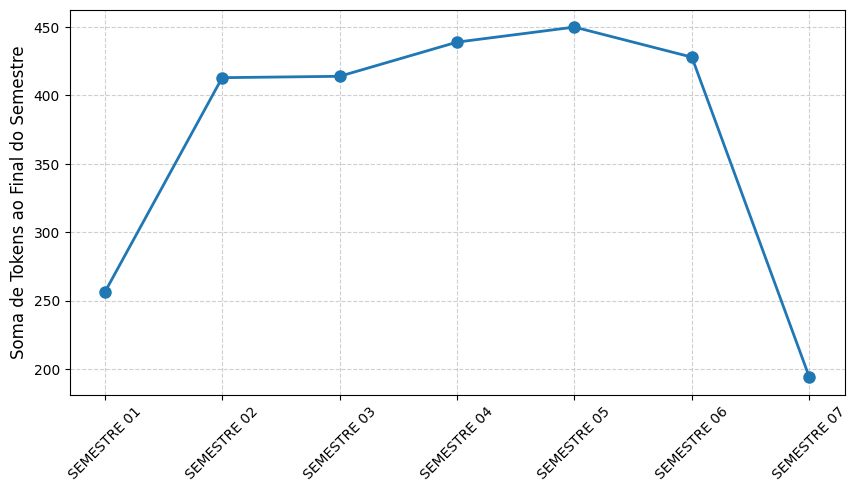

In [ ]:
import matplotlib.pyplot as plt

# Criar o gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(df_tokens_por_semestre["Semestre"], df_tokens_por_semestre["Total de Tokens"], marker='o', linestyle='-', linewidth=2, markersize=8)

# Adicionar rótulos e título
#plt.xlabel("Semestre")
plt.ylabel("Soma de Tokens ao Final do Semestre", fontsize=12)
#plt.title("Distribuição de Tokens Remanescentes por Semestre")
plt.grid(True, linestyle='--', alpha=0.6)

# Rotacionar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)
#plt.savefig('new_tokensRemanescentesSemestre_atuali.pdf', dpi=300, bbox_inches='tight')
# Exibir o gráfico
plt.show()


# Alinhamentos

In [ ]:
#from pm4py.algo.conformance.alignments import algorithm as alignments
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments

aligned_traces = alignments.apply_log(df_log, netCC, initial_marking, final_marking)
#print("Aligned Traces:", aligned_traces)

# Criar um DataFrame a partir do resultado do alinhamento
df_alignments = pd.DataFrame(aligned_traces)

# Opcional: salvar em um arquivo CSV
df_alignments.to_csv("/content/drive/MyDrive/Mestrado/dados/resultados_alinhamento_final3.csv", index=False)